# Q.1: Import data and check null values, column info, and descriptive statistics of the data.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
data=pd.read_csv('Instagram-Reach.csv')

In [15]:
data

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [16]:
# Check for null values
print(data.isnull().sum())

Date               0
Instagram reach    0
dtype: int64


In [17]:

# Display column information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


In [18]:
# Provide descriptive statistics
print(data.describe())

       Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


# Q.2: You can convert the Date column into datetime datatype to move forward.


In [19]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
data['Date']

0     2022-04-01
1     2022-04-02
2     2022-04-03
3     2022-04-04
4     2022-04-05
         ...    
360   2023-03-27
361   2023-03-28
362   2023-03-29
363   2023-03-30
364   2023-03-31
Name: Date, Length: 365, dtype: datetime64[ns]

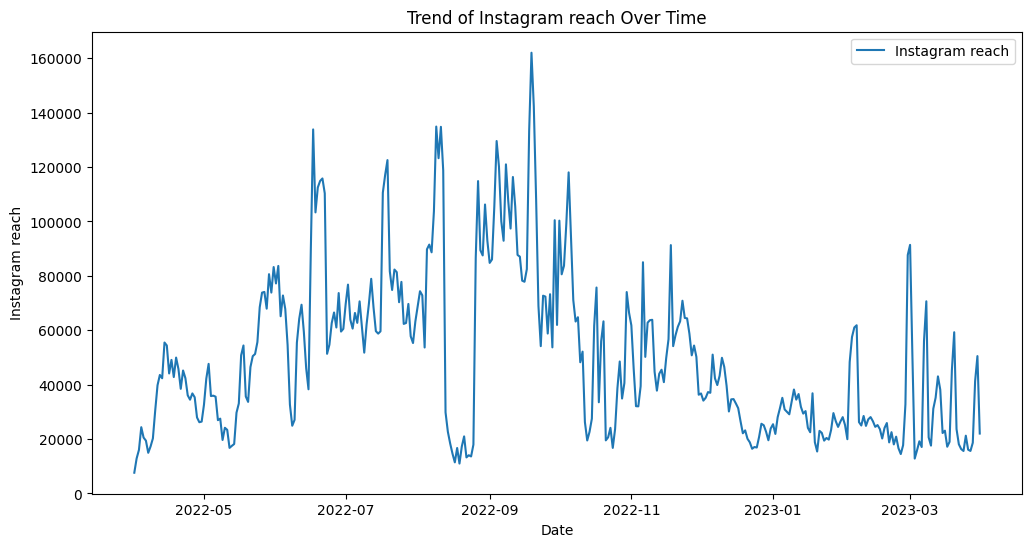

In [22]:
# Plot a line chart showing the Instagram reach over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Instagram reach'], label='Instagram reach')
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.title('Trend of Instagram reach Over Time')
plt.legend()
plt.show()

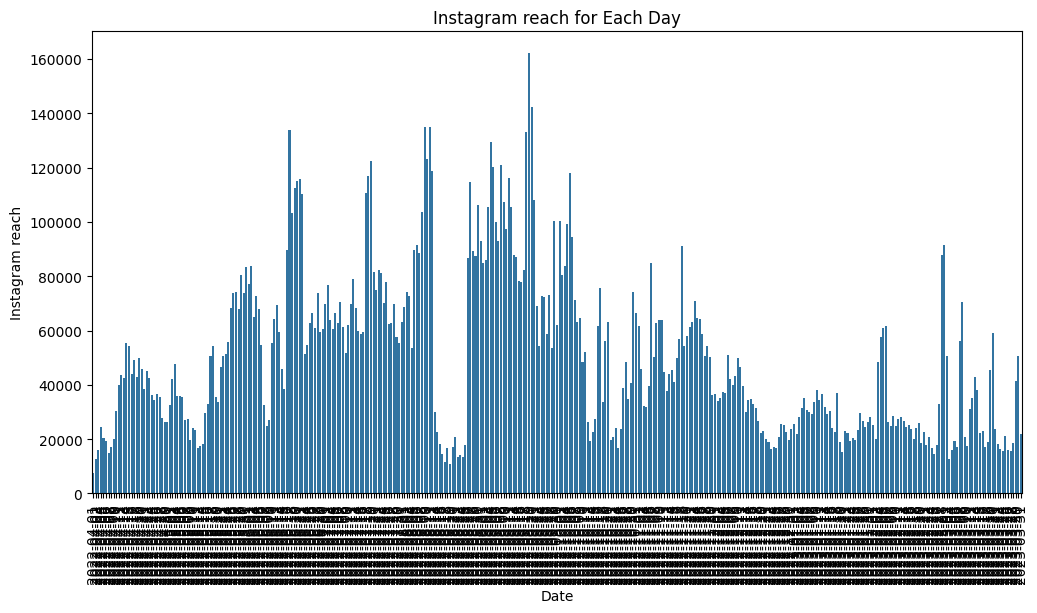

In [24]:
# Plot a bar chart showing the reach for each day
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Date'].dt.date, y=data['Instagram reach'])
plt.xlabel('Date')
plt.ylabel('Instagram reach')
plt.title('Instagram reach for Each Day')
plt.xticks(rotation=90)
plt.show()


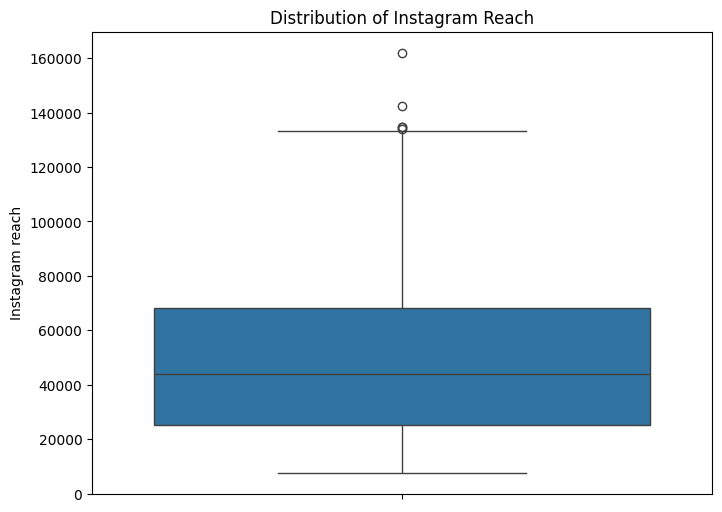

In [25]:
# Plot a box plot to visualize the distribution of reach
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Instagram reach'])
plt.title('Distribution of Instagram Reach')
plt.show()


In [26]:
# Extract the day of the week from the 'Date' column and create a new column 'Day'
data['Day'] = data['Date'].dt.day_name()

# Group the DataFrame by 'Day' and calculate mean, median, and standard deviation of reach
day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)


         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


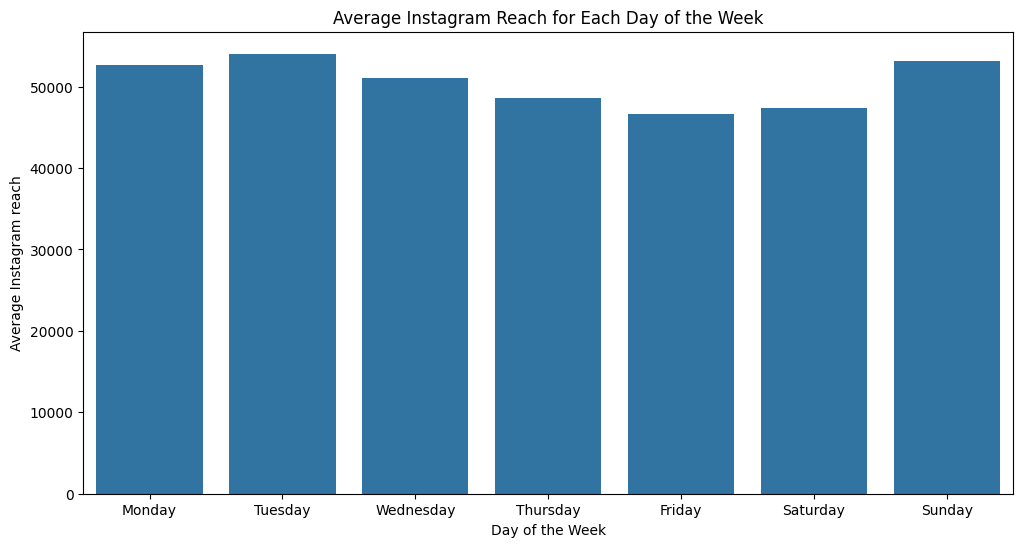

In [27]:
# Plot a bar chart showing the average reach for each day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='mean', data=day_stats, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Instagram reach')
plt.title('Average Instagram Reach for Each Day of the Week')
plt.show()


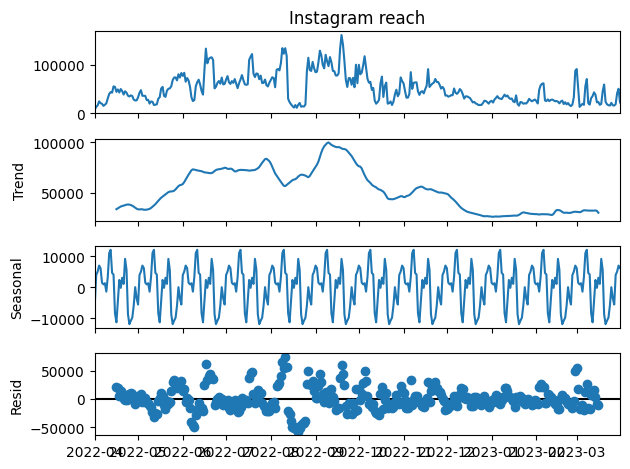

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
data.set_index('Date', inplace=True)
result = seasonal_decompose(data['Instagram reach'], model='additive', period=30)
result.plot()
plt.show()


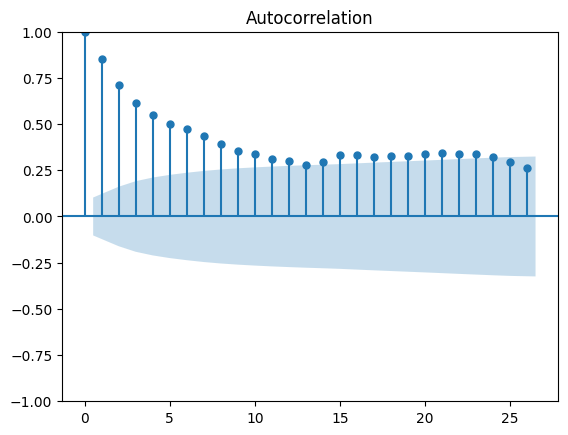

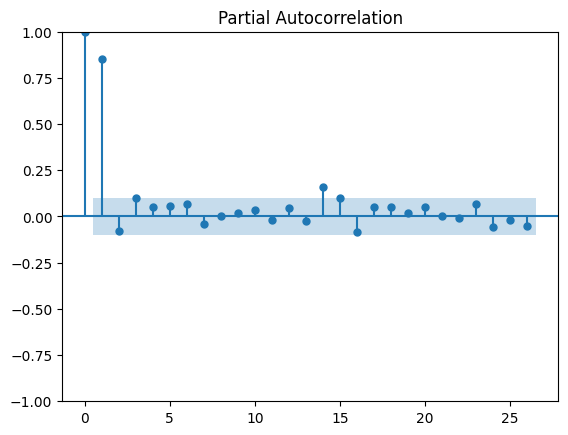

NameError: name 'p' is not defined

In [30]:
# Determine the values of p, d, and q using autocorrelation and partial autocorrelation plots
plot_acf(data['Instagram reach'])
plt.show()

plot_pacf(data['Instagram reach'])
plt.show()

# Define the SARIMA model
model = SARIMAX(data['Instagram reach'], order=(p, 1, q), seasonal_order=(P, D, Q, s))

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions
forecast = model_fit.forecast(steps=30)
print(forecast)
